
##### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
## Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
# Module 13 Challenge Submission - Sandbox_13.1
## ( *A30-34.h5* - Various `loss` and `[metrics]` Functions - `epochs=1000` )
---

# Venture Funding with Deep Learning


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# # Review the DataFrame
# applicant_data_df.head()

In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 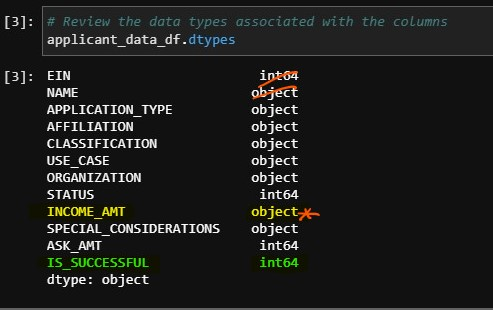

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [5]:
# Drop the other columns from the DataFrame as needed
applicant_data_df_cropped = applicant_data_df.drop(columns = ["SPECIAL_CONSIDERATIONS"])


#.drop(columns = ["AFFILIATION", "APPLICATION_TYPE", "CLASSIFICATION", "ORGANIZATION", "INCOME_AMT", "ASK_AMT", "STATUS", "USE_CASE", "SPECIAL_CONSIDERATIONS"])

# # Review the DataFrame
applicant_data_df_cropped[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0


In [6]:
# Create a list of categorical variables 
categorical_variables_cropped = list(applicant_data_df_cropped.dtypes[applicant_data_df_cropped.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_cropped

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df_cropped[categorical_variables_cropped])

In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables_cropped)
)

# # Review the DataFrame
# encoded_df.head()

In [10]:
numerical_variables_df = applicant_data_df_cropped.drop(columns = categorical_variables_cropped
                                                       )

# # Review the DataFrame
# numerical_variables_df.head()

In [11]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# # Review the Dataframe
# fully_encoded_df.head()

In [12]:
applicant_data_df_cropped.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [13]:
fully_encoded_df.dtypes

STATUS                      int64
ASK_AMT                     int64
IS_SUCCESSFUL               int64
APPLICATION_TYPE_T10      float64
APPLICATION_TYPE_T12      float64
                           ...   
INCOME_AMT_10M-50M        float64
INCOME_AMT_1M-5M          float64
INCOME_AMT_25000-99999    float64
INCOME_AMT_50M+           float64
INCOME_AMT_5M-10M         float64
Length: 115, dtype: object

In [14]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# # Display a sample of y
# y[:5]

In [15]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# # Review the features DataFrame
# X.head()

In [16]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


# Alternative Model 30+

In [18]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [19]:
# Define the number of neurons in the output layer
number_output_neurons_A30 = 1

In [20]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A30 =  (number_input_features + number_output_neurons_A30) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A30

57

In [21]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A30 =  (hidden_nodes_layer1_A30 + number_output_neurons_A30) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A30

29

In [22]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A30 =  (hidden_nodes_layer2_A30 + number_output_neurons_A30) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A30

15

In [23]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A30 =  (hidden_nodes_layer3_A30 + number_output_neurons_A30) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A30

8

In [24]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A30 =  (hidden_nodes_layer4_A30 + number_output_neurons_A30) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A30

4

In [25]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A30 =  (hidden_nodes_layer5_A30 + number_output_neurons_A30) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A30

2

In [26]:
# Create and Display the Sequential Model Instance 
# for Model A30
nn_A30 = Sequential() 

# Add the first hidden layer
nn_A30.add(Dense(units=hidden_nodes_layer1_A30, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A30.add(Dense(units=hidden_nodes_layer2_A30, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A30.add(Dense(units=hidden_nodes_layer3_A30, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A30.add(Dense(units=hidden_nodes_layer4_A30, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A30.add(Dense(units=hidden_nodes_layer5_A30, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A30.add(Dense(units=hidden_nodes_layer6_A30, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A30.add(Dense(units=number_output_neurons_A30, activation="sigmoid"))

# Display the Sequential model summary
nn_A30.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 57)                6555      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [27]:
# Compile the Sequential model
nn_A30.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [28]:
# Fit the model using 50 epochs and the training data
fit_model_A30 = nn_A30.fit(X_train_scaled, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
563/563 [==============================] - 1s 2ms/step - loss: 0.2274 - accuracy: 0.6594 - val_loss: 0.1872 - val_accuracy: 0.7328
Epoch 2/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1893 - accuracy: 0.7211 - val_loss: 0.1833 - val_accuracy: 0.7343
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1845 - accuracy: 0.7275 - val_loss: 0.1831 - val_accuracy: 0.7371
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1848 - accuracy: 0.7301 - val_loss: 0.1824 - val_accuracy: 0.7394
Epoch 5/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1867 - accuracy: 0.7248 - val_loss: 0.1816 - val_accuracy: 0.7407
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1870 - accuracy: 0.7237 - val_loss: 0.1825 - val_accuracy: 0.7410
Epoch 7/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1808 - accuracy: 0.7373 - val_loss: 0.1817 - val_accuracy: 0.7403
Epoch 

In [29]:
print("Alternative Model 30 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A30.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 30 Results
Loss: 0.1860416680574417, Accuracy: 0.7287463545799255


# Alternative Model 31+

In [30]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [31]:
# Define the number of neurons in the output layer
number_output_neurons_A31 = 1

In [32]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A31 =  (number_input_features + number_output_neurons_A31) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A31

57

In [33]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A31 =  (hidden_nodes_layer1_A31 + number_output_neurons_A31) // 2
hidden_nodes_layer2_A31 = hidden_nodes_layer1_A31

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A31

57

In [34]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A31 =  (hidden_nodes_layer2_A31 + number_output_neurons_A31) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A31

29

In [35]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A31 =  (hidden_nodes_layer3_A31 + number_output_neurons_A31) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A31

15

In [36]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A31 =  (hidden_nodes_layer4_A31 + number_output_neurons_A31) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A31

8

In [37]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A31 = (hidden_nodes_layer5_A31 + number_output_neurons_A31) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A31

4

In [38]:
# Create and Display the Sequential Model Instance 
# for Model A31
nn_A31 = Sequential() 

# Add the first hidden layer
nn_A31.add(Dense(units=hidden_nodes_layer1_A31, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A31.add(Dense(units=hidden_nodes_layer2_A31, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A31.add(Dense(units=hidden_nodes_layer3_A31, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A31.add(Dense(units=hidden_nodes_layer4_A31, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A31.add(Dense(units=hidden_nodes_layer5_A31, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A31.add(Dense(units=hidden_nodes_layer6_A31, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A31.add(Dense(units=number_output_neurons_A31, activation="sigmoid"))

# Display the Sequential model summary
nn_A31.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 57)                6555      
_________________________________________________________________
dense_8 (Dense)              (None, 57)                3306      
_________________________________________________________________
dense_9 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_10 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [39]:
# Compile the Sequential model
nn_A31.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [40]:
# Fit the model using 50 epochs and the training data
fit_model_A31 = nn_A31.fit(X_train_scaled, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
563/563 [==============================] - 1s 1ms/step - loss: 0.2256 - mse: 0.2256 - val_loss: 0.1862 - val_mse: 0.1862
Epoch 2/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1899 - mse: 0.1899 - val_loss: 0.1836 - val_mse: 0.1836
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1845 - mse: 0.1845 - val_loss: 0.1818 - val_mse: 0.1818
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1869 - mse: 0.1869 - val_loss: 0.1833 - val_mse: 0.1833
Epoch 5/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1856 - mse: 0.1856 - val_loss: 0.1824 - val_mse: 0.1824
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1850 - mse: 0.1850 - val_loss: 0.1816 - val_mse: 0.1816
Epoch 7/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1814 - mse: 0.1814 - val_loss: 0.1826 - val_mse: 0.1826
Epoch 8/10
563/563 [==============================] - 1s 1ms/step - loss: 0.

In [41]:
print("Alternative Model 31 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A31.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 31 Results
Loss: 0.1853223294019699, Accuracy: 0.1853223294019699


# Alternative Model 32+

In [42]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [43]:
# Define the number of neurons in the output layer
number_output_neurons_A32 = 1

In [44]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A32 =  (number_input_features + number_output_neurons_A32) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A32

57

In [45]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A32 =  (hidden_nodes_layer1_A32 + number_output_neurons_A32) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A32

29

In [46]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A32 =  (hidden_nodes_layer2_A32 + number_output_neurons_A32) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A32

15

In [47]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A32 =  (hidden_nodes_layer3_A32 + number_output_neurons_A32) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A32

8

In [48]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A32 =  (hidden_nodes_layer4_A32 + number_output_neurons_A32) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A32

4

In [49]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A32 =  (hidden_nodes_layer5_A32 + number_output_neurons_A32) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A32

2

In [50]:
# Create and Display the Sequential Model Instance 
# for Model A32
nn_A32 = Sequential() 

# Add the first hidden layer
nn_A32.add(Dense(units=hidden_nodes_layer1_A32, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A32.add(Dense(units=hidden_nodes_layer2_A32, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A32.add(Dense(units=hidden_nodes_layer3_A32, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A32.add(Dense(units=hidden_nodes_layer4_A32, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A32.add(Dense(units=hidden_nodes_layer5_A32, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A32.add(Dense(units=hidden_nodes_layer6_A32, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A32.add(Dense(units=number_output_neurons_A32, activation="sigmoid"))

# Display the Sequential model summary
nn_A32.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_15 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_16 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [51]:
# Compile the Sequential model
nn_A32.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [52]:
# Fit the model using 50 epochs and the training data
fit_model_A32 = nn_A32.fit(X_train_scaled, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
563/563 [==============================] - 1s 1ms/step - loss: 0.2370 - accuracy: 0.6257 - val_loss: 0.2036 - val_accuracy: 0.7283
Epoch 2/10
563/563 [==============================] - 1s 1ms/step - loss: 0.2019 - accuracy: 0.7196 - val_loss: 0.1939 - val_accuracy: 0.7334
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1948 - accuracy: 0.7229 - val_loss: 0.1908 - val_accuracy: 0.7354
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1958 - accuracy: 0.7200 - val_loss: 0.1897 - val_accuracy: 0.7352
Epoch 5/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1949 - accuracy: 0.7231 - val_loss: 0.1892 - val_accuracy: 0.7346
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1956 - accuracy: 0.7154 - val_loss: 0.1860 - val_accuracy: 0.7391
Epoch 7/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1891 - accuracy: 0.7276 - val_loss: 0.1866 - val_accuracy: 0.7375
Epoch 

In [53]:
print("Alternative Model 32 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A32.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 32 Results
Loss: 0.18699339032173157, Accuracy: 0.7285131216049194


# Alternative Model 33+

In [54]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [55]:
# Define the number of neurons in the output layer
number_output_neurons_A33 = 1

In [56]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A33 =  (number_input_features + number_output_neurons_A33) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A33

57

In [57]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A33 =  (hidden_nodes_layer1_A33 + number_output_neurons_A33) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A33

29

In [58]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A33 =  (hidden_nodes_layer2_A33 + number_output_neurons_A33) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A33

15

In [59]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A33 =  (hidden_nodes_layer3_A33 + number_output_neurons_A33) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A33

8

In [60]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A33 =  (hidden_nodes_layer4_A33 + number_output_neurons_A33) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A33

4

In [61]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A33 =  (hidden_nodes_layer5_A33 + number_output_neurons_A33) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A33

2

In [76]:
# Create and Display the Sequential Model Instance 
# for Model A33
nn_A33 = Sequential() 

# Add the first hidden layer
nn_A33.add(Dense(units=hidden_nodes_layer1_A33, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A33.add(Dense(units=hidden_nodes_layer2_A33, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A33.add(Dense(units=hidden_nodes_layer3_A33, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A33.add(Dense(units=hidden_nodes_layer4_A33, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A33.add(Dense(units=hidden_nodes_layer5_A33, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A33.add(Dense(units=hidden_nodes_layer6_A33, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A33.add(Dense(units=number_output_neurons_A33, activation="sigmoid"))

# Display the Sequential model summary
nn_A33.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_29 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_30 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [77]:
# Compile the Sequential model
nn_A33.compile(loss="loss", optimizer="adam", metrics=["accuracy"])

In [78]:
# Fit the model using 50 epochs and the training data
fit_model_A33 = nn_A33.fit(X_train_scaled, y_train, validation_split=0.3, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:186 __call__
        self.build(y_pred)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:139 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:262 _get_loss_object
        loss = losses_mod.get(loss)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1899 get
        return deserialize(identifier)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1858 deserialize
        printable_module_name='loss function')
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown loss function: loss


In [79]:
print("Alternative Model 33 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A33.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 33 Results


ValueError: in user code:

    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1186 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:186 __call__
        self.build(y_pred)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:139 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:262 _get_loss_object
        loss = losses_mod.get(loss)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1899 get
        return deserialize(identifier)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1858 deserialize
        printable_module_name='loss function')
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown loss function: loss


# Alternative Model 34+

In [80]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [81]:
# Define the number of neurons in the output layer
number_output_neurons_A34 = 1

In [82]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A34 =  (number_input_features + number_output_neurons_A34) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A34

57

In [83]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A34 =  (hidden_nodes_layer1_A34 + number_output_neurons_A34) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A34

29

In [84]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A34 =  (hidden_nodes_layer2_A34 + number_output_neurons_A34) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A34

15

In [85]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A34 =  (hidden_nodes_layer3_A34 + number_output_neurons_A34) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A34

8

In [86]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A34 =  (hidden_nodes_layer4_A34 + number_output_neurons_A34) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A34

4

In [87]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A34 =  (hidden_nodes_layer5_A34 + number_output_neurons_A34) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A34

2

In [88]:
# Create and Display the Sequential Model Instance 
# for Model A34
nn_A34 = Sequential() 

# Add the first hidden layer
nn_A34.add(Dense(units=hidden_nodes_layer1_A34, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A34.add(Dense(units=hidden_nodes_layer2_A34, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A34.add(Dense(units=hidden_nodes_layer3_A34, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A34.add(Dense(units=hidden_nodes_layer4_A34, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A34.add(Dense(units=hidden_nodes_layer5_A34, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A34.add(Dense(units=hidden_nodes_layer6_A34, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A34.add(Dense(units=number_output_neurons_A34, activation="sigmoid"))

# Display the Sequential model summary
nn_A34.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_36 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_37 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                

In [89]:
# Compile the Sequential model
nn_A34.compile(loss="ema", optimizer="adam", metrics=["mse"])

In [90]:
# Fit the model using 50 epochs and the training data
fit_model_A34 = nn_A34.fit(X_train_scaled, y_train, validation_split=0.3, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:186 __call__
        self.build(y_pred)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:139 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:262 _get_loss_object
        loss = losses_mod.get(loss)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1899 get
        return deserialize(identifier)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1858 deserialize
        printable_module_name='loss function')
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown loss function: ema


In [91]:
print("Alternative Model 34 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A34.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 34 Results


ValueError: in user code:

    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1186 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:186 __call__
        self.build(y_pred)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:139 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:262 _get_loss_object
        loss = losses_mod.get(loss)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1899 get
        return deserialize(identifier)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1858 deserialize
        printable_module_name='loss function')
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown loss function: ema


---
---

### Step 2: After completing your models, display the accuracy scores achieved by each model, and compare the results.

In [92]:
print("Alternative Model 30 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A30.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 30 Results
Loss: 0.1860416680574417, Accuracy: 0.7287463545799255


<AxesSubplot:title={'center':'model_accuracy: A30'}>

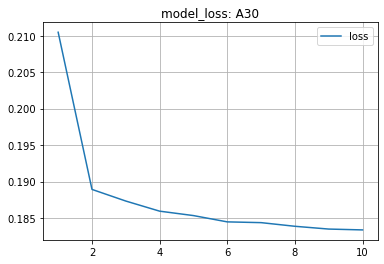

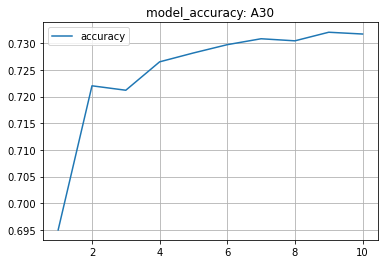

In [93]:
model_plot = pd.DataFrame(fit_model_A30.history, index=range(1, len(fit_model_A30.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A30")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A30")

In [94]:
print("Alternative Model 31 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A31.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 31 Results
Loss: 0.1853223294019699, Accuracy: 0.1853223294019699


KeyError: 'accuracy'

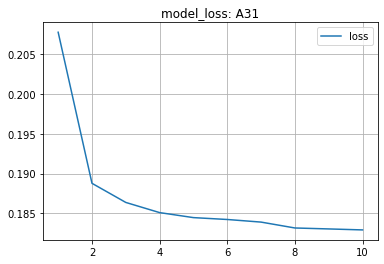

In [95]:
model_plot = pd.DataFrame(fit_model_A31.history, index=range(1, len(fit_model_A31.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A31")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A31")

In [96]:
print("Alternative Model 32 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A32.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 32 Results
Loss: 0.18699339032173157, Accuracy: 0.7285131216049194


<AxesSubplot:title={'center':'model_accuracy: A32'}>

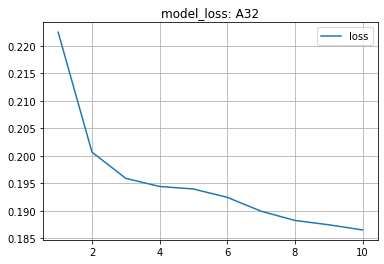

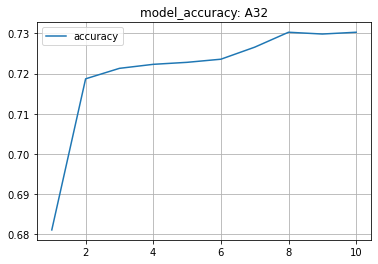

In [97]:
model_plot = pd.DataFrame(fit_model_A32.history, index=range(1, len(fit_model_A32.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A32")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A32")

In [98]:
print("Alternative Model 33 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A33.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 33 Results


ValueError: in user code:

    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1186 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:186 __call__
        self.build(y_pred)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:139 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:262 _get_loss_object
        loss = losses_mod.get(loss)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1899 get
        return deserialize(identifier)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1858 deserialize
        printable_module_name='loss function')
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown loss function: loss


In [99]:
model_plot = pd.DataFrame(fit_model_A33.history, index=range(1, len(fit_model_A33.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A33")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A33")

NameError: name 'fit_model_A33' is not defined

In [100]:
print("Alternative Model 34 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A34.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 34 Results


ValueError: in user code:

    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\training.py:1186 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:186 __call__
        self.build(y_pred)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:139 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\util\nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:262 _get_loss_object
        loss = losses_mod.get(loss)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1899 get
        return deserialize(identifier)
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\losses.py:1858 deserialize
        printable_module_name='loss function')
    C:\Users\konra\.conda\envs\dev\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown loss function: ema


In [101]:
model_plot = pd.DataFrame(fit_model_A34.history, index=range(1, len(fit_model_A34.history["loss"]) + 1))
model_plot.plot(y="loss", title="model_loss: A34", grid=True)
model_plot.plot(y="accuracy", title="model_accuracy: A34", grid=True)

NameError: name 'fit_model_A34' is not defined

### Step 2(b): Plot and Compare the Results of each Alternative Model

NameError: name 'fit_model_A33' is not defined

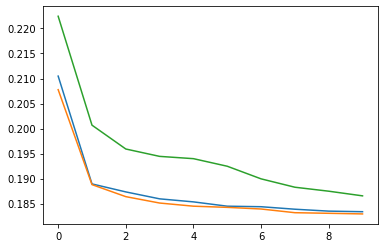

In [102]:
# Day 14-2 cell [62]
plt.plot(fit_model_A30.history["loss"])
plt.plot(fit_model_A31.history["loss"])
plt.plot(fit_model_A32.history["loss"])
plt.plot(fit_model_A33.history["loss"])
plt.plot(fit_model_A34.history["loss"])

plt.title("loss_function - Training")
plt.legend(["Model 30",
            "Model 31",
            "Model 32",
            "Model 33",
            "Model 34"
           ])
plt.show()

KeyError: 'accuracy'

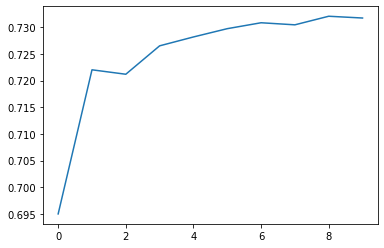

In [103]:
# Day 14-2 cell [62]
plt.plot(fit_model_A30.history["accuracy"])
plt.plot(fit_model_A31.history["accuracy"])
plt.plot(fit_model_A32.history["accuracy"])
plt.plot(fit_model_A33.history["accuracy"])
plt.plot(fit_model_A34.history["accuracy"])

plt.title("accuracy_function - Training")
plt.legend(["Model 30",
            "Model 31",
            "Model 32",
            "Model 33",
            "Model 34"
           ])
plt.show()

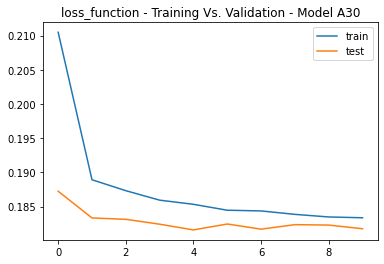

In [104]:
# Train vs test for shallow net
plt.plot(fit_model_A30.history["loss"])
plt.plot(fit_model_A30.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A30")
plt.legend(["train", "test"])
plt.show()

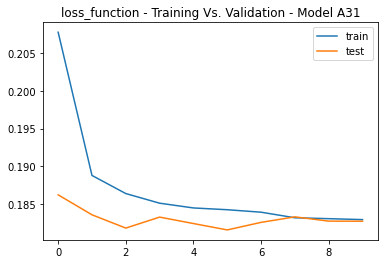

In [105]:
# Train vs test for deep net
plt.plot(fit_model_A31.history["loss"])
plt.plot(fit_model_A31.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A31")
plt.legend(["train", "test"])
plt.show()

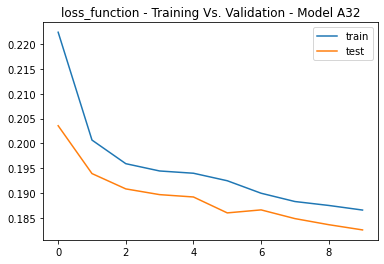

In [106]:
# Train vs test for deep net
plt.plot(fit_model_A32.history["loss"])
plt.plot(fit_model_A32.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A32")
plt.legend(["train", "test"])
plt.show()

In [107]:
# Train vs test for deep net
plt.plot(fit_model_A33.history["loss"])
plt.plot(fit_model_A33.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A33")
plt.legend(["train", "test"])
plt.show()

NameError: name 'fit_model_A33' is not defined

In [108]:
# Train vs test for deep net
plt.plot(fit_model_A34.history["loss"])
plt.plot(fit_model_A34.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A34")
plt.legend(["train", "test"])
plt.show()

NameError: name 'fit_model_A34' is not defined

# ================================

### Step 3: Save each of your alternative models as an HDF5 file.


In [109]:
# Set the file path for the fifth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A30.h5")
# Export your model to a HDF5 file
nn_A30.save(file_path)

In [110]:
# Set the file path for the sixth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A31.h5")
# Export your model to a HDF5 file
nn_A31.save(file_path)

In [111]:
# Set the file path for the seventh alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A32.h5")
# Export your model to a HDF5 file
nn_A32.save(file_path)

In [112]:
# Set the file path for the eighth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A33.h5")
# Export your model to a HDF5 file
nn_A33.save(file_path)

In [113]:
# Set the file path for the ninth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A34.h5")
# Export your model to a HDF5 file
nn_A34.save(file_path)